In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io

from sklearn.model_selection import train_test_split

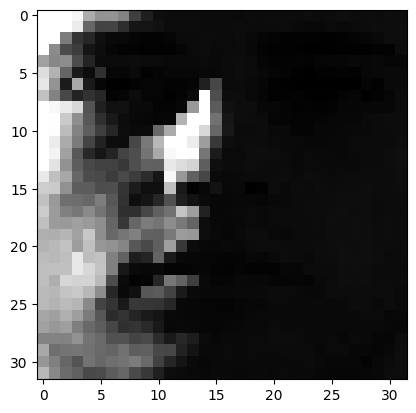

<Figure size 640x480 with 0 Axes>

In [25]:

yaleData = scipy.io.loadmat(os.path.join('../', 'public', 'YaleB_32x32.mat'))

# Extract the data and labels
data = (yaleData['fea'])
labels = (yaleData['gnd'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.1, random_state=42)

im0 = X_train[0].reshape(32, 32).T
plt.imshow(im0, cmap = plt.get_cmap("gray"))
plt.show()
plt.clf()
# print('X_train shape:', X_train.shape)
# print('y_train shape:', y_train.shape)
# print('X_test shape:', X_test.shape)
# print('y_test shape:', y_test.shape)


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report


# SVM model
svm = SVC(kernel='linear', probability=True, gamma='auto')
svm.fit(X_train, y_train)

# Evaluate SVM model
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
svm_probs = svm.predict_proba(X_test)[:, 1]
svm_train = svm.predict(X_train)
svm_train_acc = accuracy_score(y_train, svm_train)
# svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_probs)
# svm_auc = roc_auc_score(y_test, svm_probs)
svm_cm = confusion_matrix(y_test, svm_pred)
print('SVM training accuracy is ', svm_train_acc, 'testing accuracy ', svm_acc)
print('SVM Confusion matrix:\n', svm_cm)
print(classification_report(y_test, svm_pred))



/Users/samzhang/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM training accuracy is  1.0 testing accuracy  0.9380165289256198
SVM Confusion matrix:
 [[3 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 6]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4
           3       0.80      1.00      0.89         4
           4       0.92      0.92      0.92        13
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         5
           7       0.91      1.00      0.95        10
           8       1.00      0.82      0.90        11
           9       1.00      0.83      0.91         6
          10       0.88      1.00      0.93         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         6
          13       1.00      0.86      0.92         7
          14       1.00      1.00

In [27]:
# PCA+SVM model
pca = PCA(n_components=500)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

pca_svm = SVC(kernel='linear', probability=True, gamma='auto')
pca_svm.fit(X_train_pca, y_train)

# Evaluate PCA+SVM model
pca_svm_pred = pca_svm.predict(X_test_pca)
pca_svm_acc = accuracy_score(y_test, pca_svm_pred)
pca_svm_train = pca_svm.predict(X_train_pca)
pca_svm_train_acc = accuracy_score(y_train, pca_svm_train)
pca_svm_cm = confusion_matrix(y_test, pca_svm_pred)
print('SVM training accuracy is ', pca_svm_train_acc, 'testing accuracy ', pca_svm_acc)
print('PCA + SVM Confusion matrix:\n', pca_svm_cm)
print(classification_report(y_test, pca_svm_pred))




/Users/samzhang/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM training accuracy is  1.0 testing accuracy  0.9421487603305785
PCA + SVM Confusion matrix:
 [[3 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 6]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.80      1.00      0.89         4
           3       0.80      1.00      0.89         4
           4       0.93      1.00      0.96        13
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00        10
           8       1.00      0.82      0.90        11
           9       1.00      0.83      0.91         6
          10       0.88      1.00      0.93         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         6
          13       1.00      0.86      0.92         7
          14       1.00    

In [29]:
# Random forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=12)
rf.fit(X_train, y_train)

# Evaluate random forest model
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_train = rf.predict(X_train)
rf_train_acc = accuracy_score(y_train, rf_train)
rf_probs = rf.predict_proba(X_test)[:, 1]
# rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_probs)
# rf_auc = roc_auc_score(y_test, rf_probs)
rf_cm = confusion_matrix(y_test, rf_pred)
print('training accuracy:', rf_train_acc, 'accuracy: ', rf_acc )
print('RF Confusion matrix:\n', rf_cm)
print(classification_report(y_test, rf_pred))



/var/folders/2p/frb20w6934d5p16ys32x5bwm0000gn/T/ipykernel_45559/3640368713.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


training accuracy: 0.9953959484346224 accuracy:  0.9545454545454546
RF Confusion matrix:
 [[3 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 7]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00         4
           6       0.83      1.00      0.91         5
           7       1.00      1.00      1.00        10
           8       0.92      1.00      0.96        11
           9       1.00      0.83      0.91         6
          10       1.00      0.86      0.92         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         7
          14       1.00      0.75

In [ ]:
# Plot ROC curves
# plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = %0.2f)' % svm_auc)
# plt.plot(pca_svm_fpr, pca_svm_tpr, label='PCA+SVM (AUC = %0.2f)' % pca_svm_auc)
# plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.2f)' % rf_auc)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()
